# Analysis

This notebook generates plots after running the experiments.

## Imports

In [1]:
import os, sys
import pandas as pd
import numpy as np
import utils
import json
import matplotlib.pyplot as plt

In [94]:
config_file = './config_file.json'
n_fold = 0
params = utils.Params(config_file)
experiment_output_folder = os.path.join('.', 'Experiments', params.hash, 'fold_'+str(n_fold))
figures_folder = os.path.join('.', 'Experiments', params.hash, 'Figures')
utils.create_folder(figures_folder)
print ('Hash: ', params.hash)

Hash:  490b0


## Loading Evaluation Results

In [95]:
eval_folder = os.path.join(experiment_output_folder, 'evaluation_results')
json_files = os.listdir(eval_folder)
for j, json_file in enumerate(json_files):
    with open(os.path.join(eval_folder, json_file)) as file:
        data = json.load(file)
    df_temp = pd.DataFrame(list(zip(data.keys(), data.values())), columns=['metric', 'value'])
    df_temp
    if j == 0:        
        df = pd.DataFrame(columns=df_temp['metric'].values)
    df.loc[df.shape[0]] = df_temp['value'].values

In [86]:
import random
degree_user = .9
unique_users = np.arange(100)
np.array(random.sample(list(unique_users), int(degree_user*unique_users.shape[0]))).shape

(90,)

In [97]:
df

,PREC@1,RECALL@1,NDCG@1,MAP@1,MAP,MRR@1,PREC@2,RECALL@2,NDCG@2,MAP@2,...,degree_user_thr,degree_item_thr,os,os_train,os_test,n_users,n_users_train,n_items,n_items_train,n_evals
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.022122,0.000924,0.909091,0.875000,0.750000,11,8,12,8,12
1,0.400438,0.282503,0.400438,0.400438,0.449470,0.400438,0.307440,0.404956,0.498906,0.449672,...,0.057362,0.016103,0.991710,0.993062,0.994806,640,586,750,685,3979
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041753,0.000924,0.961466,0.948148,0.909091,28,20,38,27,41
3,0.611987,0.257813,0.611987,0.611987,0.671891,0.611987,0.547319,0.434118,0.735016,0.673502,...,0.016103,0.078805,0.979699,0.983925,0.989988,321,321,784,693,5109
4,0.250000,0.250000,0.250000,0.250000,0.250000,0.250000,0.125000,0.250000,0.250000,0.250000,...,0.022122,0.001269,0.953333,0.941358,0.875000,24,18,25,18,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,0.663430,0.128181,0.663430,0.663430,0.741633,0.663430,0.671521,0.255826,0.854369,0.758900,...,0.041753,0.148735,0.967532,0.975635,0.987572,618,618,1309,1221,26265
254,0.708955,0.093592,0.708955,0.708955,0.770855,0.708955,0.706468,0.191760,0.881841,0.795398,...,0.078805,0.204336,0.951872,0.964769,0.983236,804,804,1485,1420,57462
255,0.408133,0.249818,0.408133,0.408133,0.462334,0.408133,0.326807,0.349094,0.519578,0.463855,...,0.148735,0.016103,0.986429,0.989525,0.993632,848,808,911,867,10484
256,0.658432,0.173932,0.658432,0.658432,0.694843,0.658432,0.612782,0.293132,0.794844,0.726638,...,0.385662,0.057362,0.962749,0.972957,0.986953,943,943,1481,1428,52024


In [104]:
x.shape

(21,)

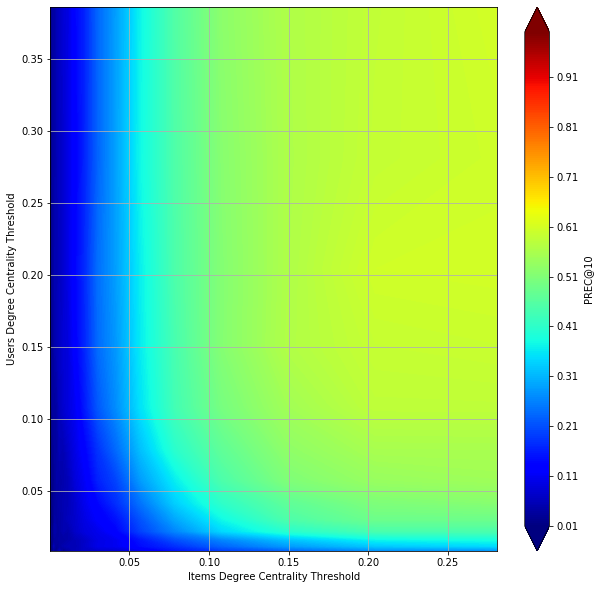

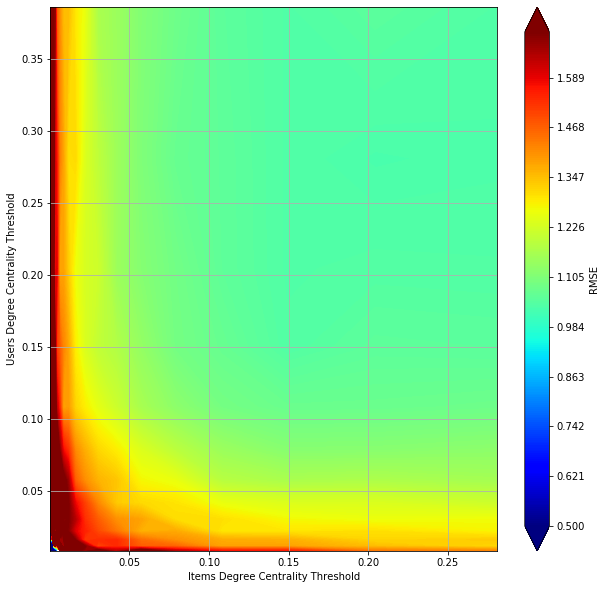

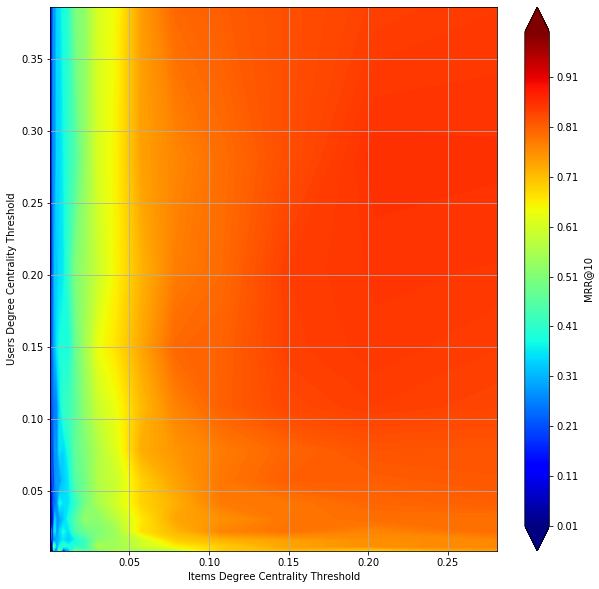

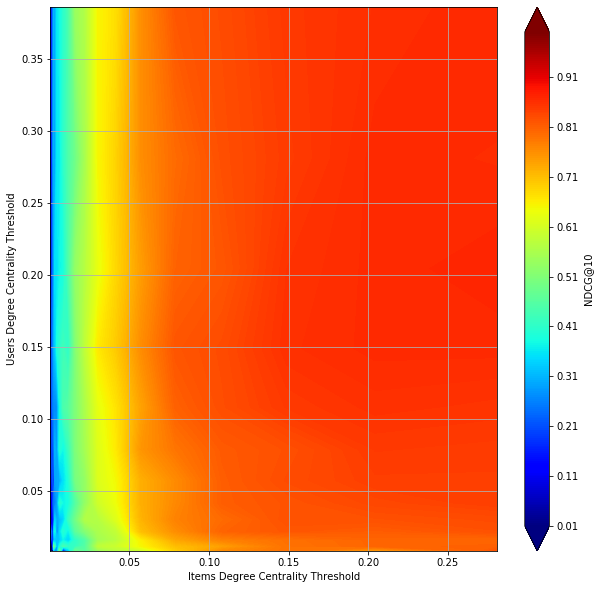

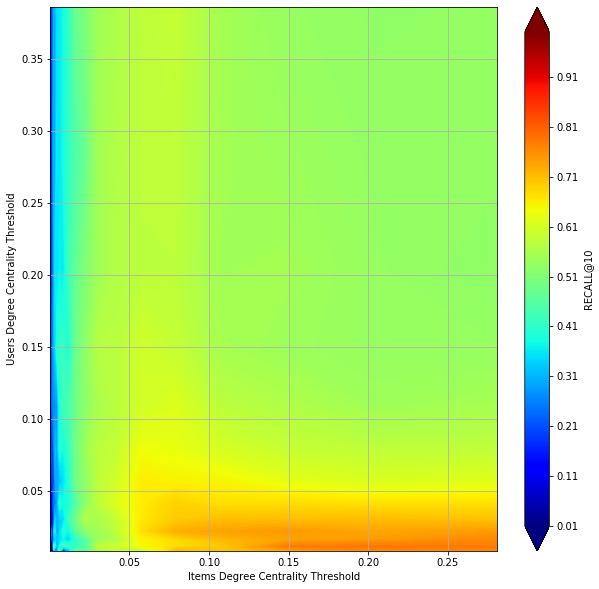

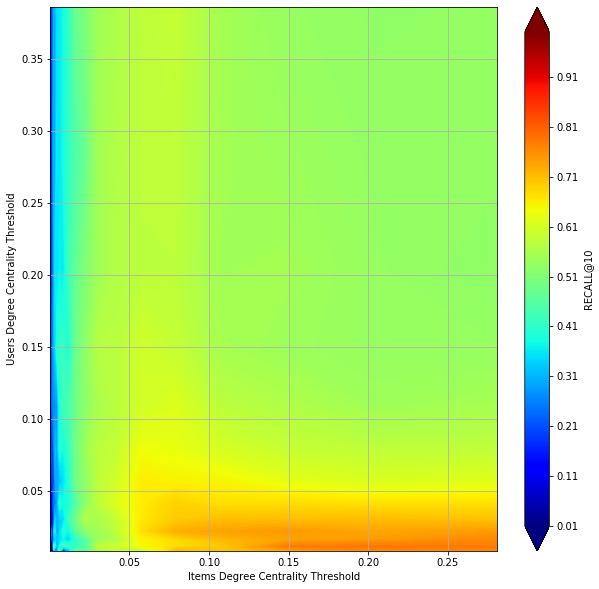

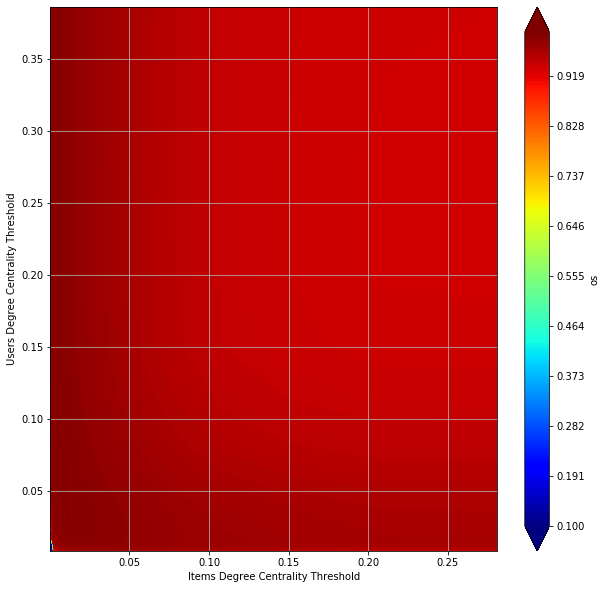

In [109]:
for metric in params.metrics + ['RECALL@10', 'os']:
# for metric in ['os']:
    x = np.sort(df['degree_item_thr'].unique())
    y = np.sort(df['degree_user_thr'].unique())
    z = np.zeros([y.shape[0], x.shape[0]])
    for u, degree_user_thr in enumerate(y):
        for i, degree_item_thr in enumerate(x):            
            cond1 = df['degree_item_thr'] == degree_item_thr
            cond2 = df['degree_user_thr'] == degree_user_thr
            df_temp = df[cond1 & cond2][metric].reset_index(drop=True) 
            if df_temp.shape[0] == 0:                
                z[u][i] = 0
            else:                          
                z[u][i] = df_temp[0]
            
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
    cmap = plt.cm.get_cmap("jet")
    if metric != 'RMSE' and metric != 'os':
        levels=np.array([float(x)/1000.0 for x in np.arange(10, 1001, 1, dtype=float)])
        cs = ax.contourf(x,y,z, cmap=cmap, extend='both', levels=levels)
    elif metric == 'os':
        levels=np.array([float(x)/1000.0 for x in np.arange(100, 1001, 1, dtype=float)])
        cs = ax.contourf(x,y,z, cmap=cmap, extend='both', levels=levels)
    else:
        levels=np.array([float(x)/1000.0 for x in np.arange(500, 1701, 1, dtype=float)])
        cs = ax.contourf(x,y,z, cmap=cmap, extend='both', levels=levels)

    ax.grid(True)
    if params.strategy == 'random':
        ax.set_ylabel('Users Fraction')
        ax.set_xlabel('Items Fraction')
    else:
        ax.set_ylabel('Users Degree Centrality Threshold')
        ax.set_xlabel('Items Degree Centrality Threshold')
    
    cbar = fig.colorbar(cs, ax=ax, shrink=1, label=metric)
    cbar.ax.set_ylim(0, 1) 
    
    cs.changed()

    fig.savefig(os.path.join(figures_folder, metric + '.jpeg'), bbox_inches='tight')